In [1]:
# logging 
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


In [2]:
# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_woods

maze = gym.make('Woods1-v0')
print("This is how maze looks like:")
situation = maze.reset()
print(type(situation))
print(situation)
maze.render()


This is how maze looks like:
<class 'list'>
['O', '.', '.', '.', '.', '.', '.', 'O']

□ □ X □ □
□ □ □ □ □
■ ■ $ □ □
■ ■ ■ □ □
■ ■ ■ □ □


In [3]:
from lcs.agents import EnvironmentAdapter
class adapter(EnvironmentAdapter):
    def to_genotype(cls, phenotype): 
        return ["1" if x=='.' else x for x in phenotype]
        
        

In [4]:
from lcs.agents.xcs import XCS, Configuration
from utils.nxcs_utils import *


In [5]:
ada = adapter()
print(ada.to_genotype(situation))

['O', '1', '1', '1', '1', '1', '1', 'O']


In [8]:
cfg = Configuration(number_of_actions=8,
                    max_population=1800,
                    learning_rate=0.2,
                    mutation_chance=0.08,
                    chi=0.8,
                    ga_threshold=25,
                    deletion_threshold=25,
                    delta=0.1,
                    initial_error=0.01,
                    metrics_trial_frequency=50,
                    covering_wildcard_chance = 0.9,
                    user_metrics_collector_fcn=xcs_maze_metrics,

                   )

In [9]:
agent = XCS(cfg)
explore_population, explore_metrics = agent.explore(maze, 1000, True)

INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 30, 'reward': 1000.0, 'perf_time': 0.016425999999999163, 'numerosity': 97, 'population': 97, 'average_specificity': 1.9381443298969072, 'fraction_accuracy': 1.0}
INFO:lcs.agents.Agent:{'trial': 100, 'steps_in_trial': 41, 'reward': 1000.0014729710549, 'perf_time': 0.2196277000000002, 'numerosity': 1800, 'population': 520, 'average_specificity': 4.366666666666666, 'fraction_accuracy': 2.4000124223680607e-15}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 13, 'reward': 1011.685958540322, 'perf_time': 0.09741280000000074, 'numerosity': 1800, 'population': 612, 'average_specificity': 4.749444444444444, 'fraction_accuracy': 3.629848402362404e-15}
INFO:lcs.agents.Agent:{'trial': 300, 'steps_in_trial': 46, 'reward': 1000.000143949667, 'perf_time': 0.42157530000000065, 'numerosity': 1800, 'population': 674, 'average_specificity': 4.987777777777778, 'fraction_accuracy': 2.801088873368434e-16}
INFO:lcs.agents.Agent:{'trial': 400, 'steps

In [10]:
for cl in explore_population:
        print(str(cl))

Cond:.OOO.... - Act:1 - Num:6 [fit: 0.001, exp: 24.00, pred: 818.172, Error:270.63331843209056]
Cond:.#...OF. - Act:1 - Num:2 [fit: 0.033, exp: 6.00, pred: 840.921, Error:90.16031611667614]
Cond:.....O#. - Act:2 - Num:1 [fit: 0.000, exp: 35.00, pred: 870.631, Error:249.3473898290552]
Cond:.....OF# - Act:3 - Num:4 [fit: 0.000, exp: 46.00, pred: 1624.522, Error:339.5095767425465]
Cond:.....OF. - Act:7 - Num:4 [fit: 0.013, exp: 10.00, pred: 875.535, Error:262.8004001575878]
Cond:....FO.. - Act:0 - Num:1 [fit: 0.011, exp: 1.00, pred: 654.482, Error:0.0]
Cond:#...#O.. - Act:1 - Num:2 [fit: 0.000, exp: 25.00, pred: 794.709, Error:264.277408649657]
Cond:#...F#.. - Act:2 - Num:10 [fit: 0.001, exp: 22.00, pred: 837.888, Error:115.8448684994715]
Cond:....#O.. - Act:5 - Num:10 [fit: 0.005, exp: 14.00, pred: 720.038, Error:159.5325820151578]
Cond:#.#.FO.# - Act:7 - Num:7 [fit: 0.002, exp: 19.00, pred: 797.565, Error:85.98819479367896]
Cond:#....F.. - Act:0 - Num:3 [fit: 0.080, exp: 2.00, pred: 652

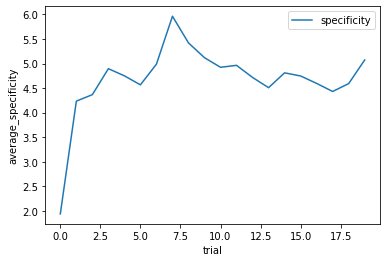

In [11]:
import pandas as pd
import numpy as np

df = pd.DataFrame(metric["average_specificity"] for metric in explore_metrics)
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("average_specificity")
ax.legend(["specificity"])


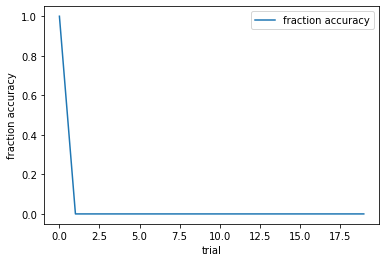

In [12]:
df = pd.DataFrame(metric["fraction_accuracy"] for metric in explore_metrics)
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("fraction accuracy")
ax.legend(["fraction accuracy"])


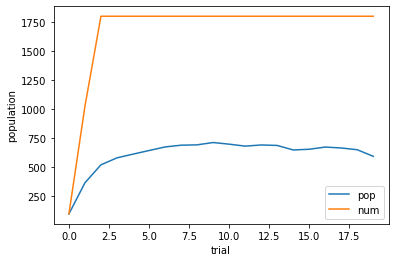

In [13]:

df = pd.DataFrame(zip([metric["population"] for metric in explore_metrics], [metric["numerosity"] for metric in explore_metrics]))
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["pop", "num"])

steps_averaged = []


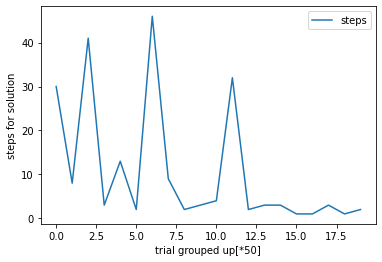

In [14]:


xf = [metric["steps_in_trial"] for metric in explore_metrics]
temp_df = np.array_split(xf, 20)
for i in range(len(temp_df)):
    temp_df[i] = np.mean(temp_df[i]) 
df = pd.DataFrame(temp_df)
# df = pd.DataFrame(metric["steps_in_trial"] for metric in explore_metrics)
ax = df.plot()
ax.set_xlabel("trial grouped up[*50]")
ax.set_ylabel("steps for solution")
ax.legend(["steps"])
